In [1]:
# Import libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Normalize the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\1582106143.py:5: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933711e+07,1.933711e+07,NaN,1,NaN,NaN,None,2023-04-04T18:19:00.000Z,28165.757934,1.827562e+10,6.6274,0.183692,0.703330,4.804901,25.489857,20.070137,66.541848,5.446444e+11,45.9049,5.914809e+11,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-04T18:19:00.000Z,1868.052855,1.201306e+10,51.8307,0.045177,3.774059,7.462042,19.073737,12.762143,48.029863,2.250215e+11,18.9582,2.250215e+11,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
2,825,Tether,USDT,tether,50668,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.990868e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-04T18:19:00.000Z,1.000168,3.512401e+10,26.9456,0.006415,0.014810,0.009967,0.006639,0.002226,0.036821,7.992210e+10,6.7356,8.310569e+10,None,2023-04-04T18:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-04 18:21:37.047489
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578877e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-04T18:19:00.000Z,311.017304,7.413019e+08,38.9454,0.038236,0.675530,0.142051,6.995092,-6.233218,19.431829,4.910579e+10,4.1386,4.975654e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
4,3408,USD Coin,USDC,usd-coin,11342,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.266175e+10,3.266175e+10,NaN,5,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.999804,4.699608e+09,21.4784,0.011293,-0.000340,-0.006889,-0.020146,-0.021023,-0.029889,3.265535e+10,2.7523,3.265535e+10,None,2023-04-04T18:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-04 18:21:37.047489
5,52,XRP,XRP,xrp,925,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.164939e+10,9.998904e+10,NaN,6,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.501909,1.535484e+09,10.6639,0.367518,-0.814961,0.032809,35.493648,23.088109,44.270103,2.592328e+10,2.1848,5.019087e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
6,2010,Cardano,ADA,cardano,760,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475142e+10,3.564336e+10,NaN,7,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.390905,4.986663e+08,-2.1850,0.279583,1.593866,9.567137,15.936994,-3.335836,45.099419,1.358451e+10,1.1449,1.759073e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
7,74,Dogecoin,DOGE,dogecoin,678,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388029e+11,1.388029e+11,NaN,8,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.095603,4.845697e+09,241.8000,-0.288388,2.968980,32.038581,27.159994,4.068024,31.502978,1.326992e+10,1.1180,1.326992e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489
8,3890,Polygon,MATIC,polygon,645,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,9,NaN,NaN,None,2023-04-04T18:19:00.0

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # This keeps it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # Creates a file in case something happens and you need the info
    if not os.path.isfile(r"C:\Users\hdill\Documents\Python Scripts\API.csv"):
        df.to_csv(r"C:\Users\hdill\Documents\Python Scripts\API.csv", header='column_names')
    else:
       df.to_csv(r"C:\Users\hdill\Documents\Python Scripts\API.csv", mode='a', headers=False) 


In [7]:
import os 
from time import time
from time import sleep

for i in range(333): # There are only 333 runs/day
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\hdill\AppData\Local\Temp\ipykernel_29056\197590358.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933711e+07,1.933711e+07,NaN,1,NaN,NaN,None,2023-04-04T18:19:00.000Z,28165.757934,1.827562e+10,6.6274,0.183692,0.703330,4.804901,25.489857,20.070137,66.541848,5.446444e+11,45.9049,5.914809e+11,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,NaN,2,NaN,NaN,None,2023-04-04T18:19:00.000Z,1868.052855,1.201306e+10,51.8307,0.045177,3.774059,7.462042,19.073737,12.762143,48.029863,2.250215e+11,18.9582,2.250215e+11,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
2,825,Tether,USDT,tether,50668,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.990868e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-04-04T18:19:00.000Z,1.000168,3.512401e+10,26.9456,0.006415,0.014810,0.009967,0.006639,0.002226,0.036821,7.992210e+10,6.7356,8.310569e+10,None,2023-04-04T18:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-04 18:21:37.047489,NaT
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578877e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-04-04T18:19:00.000Z,311.017304,7.413019e+08,38.9454,0.038236,0.675530,0.142051,6.995092,-6.233218,19.431829,4.910579e+10,4.1386,4.975654e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
4,3408,USD Coin,USDC,usd-coin,11342,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.266175e+10,3.266175e+10,NaN,5,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.999804,4.699608e+09,21.4784,0.011293,-0.000340,-0.006889,-0.020146,-0.021023,-0.029889,3.265535e+10,2.7523,3.265535e+10,None,2023-04-04T18:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-04 18:21:37.047489,NaT
5,52,XRP,XRP,xrp,925,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.164939e+10,9.998904e+10,NaN,6,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.501909,1.535484e+09,10.6639,0.367518,-0.814961,0.032809,35.493648,23.088109,44.270103,2.592328e+10,2.1848,5.019087e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
6,2010,Cardano,ADA,cardano,760,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475142e+10,3.564336e+10,NaN,7,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.390905,4.986663e+08,-2.1850,0.279583,1.593866,9.567137,15.936994,-3.335836,45.099419,1.358451e+10,1.1449,1.759073e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
7,74,Dogecoin,DOGE,dogecoin,678,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388029e+11,1.388029e+11,NaN,8,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.095603,4.845697e+09,241.8000,-0.288388,2.968980,32.038581,27.159994,4.068024,31.502978,1.326992e+10,1.1180,1.326992e+10,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
8,3890,Polygon,MATIC,polygon,645,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+1

In [ ]:
# How to call csv if needed
df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
df72

In [9]:
# Change the scientific notation in columns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10141,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19337112.00000,19337112.00000,NaN,1,NaN,NaN,None,2023-04-04T18:19:00.000Z,28165.75793,18275618936.23081,6.62740,0.18369,0.70333,4.80490,25.48986,20.07014,66.54185,544644415738.37122,45.90490,591480916618.04004,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
1,1027,Ethereum,ETH,ethereum,6694,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,NaN,2,NaN,NaN,None,2023-04-04T18:19:00.000Z,1868.05285,12013055643.42338,51.83070,0.04518,3.77406,7.46204,19.07374,12.76214,48.02986,225021492306.38510,18.95820,225021492306.39001,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
2,825,Tether,USDT,tether,50668,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,79908675808.87434,83091735571.91554,NaN,3,NaN,NaN,None,2023-04-04T18:19:00.000Z,1.00017,35124008275.41657,26.94560,0.00642,0.01481,0.00997,0.00664,0.00223,0.03682,79922099389.39848,6.73560,83105693863.58000,None,2023-04-04T18:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-04 18:21:37.047489,NaT
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157887656.59203,159979963.59043,NaN,4,NaN,NaN,None,2023-04-04T18:19:00.000Z,311.01730,741301928.62194,38.94540,0.03824,0.67553,0.14205,6.99509,-6.23322,19.43183,49105793280.53321,4.13860,49756536962.21000,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
4,3408,USD Coin,USDC,usd-coin,11342,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32661753444.20599,32661753444.20599,NaN,5,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.99980,4699608435.15328,21.47840,0.01129,-0.00034,-0.00689,-0.02015,-0.02102,-0.02989,32655345699.87387,2.75230,32655345699.87000,None,2023-04-04T18:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-04 18:21:37.047489,NaT
5,52,XRP,XRP,xrp,925,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51649390115.00000,99989037909.00000,NaN,6,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.50191,1535484201.94606,10.66390,0.36752,-0.81496,0.03281,35.49365,23.08811,44.27010,25923277357.32372,2.18480,50190868274.74000,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
6,2010,Cardano,ADA,cardano,760,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34751420480.98500,35643358227.61100,NaN,7,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.39091,498666268.55807,-2.18500,0.27958,1.59387,9.56714,15.93699,-3.33584,45.09942,13584508472.66084,1.14490,17590730761.76000,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 18:21:37.047489,NaT
7,74,Dogecoin,DOGE,dogecoin,678,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138802936383.70520,138802936383.70520,NaN,8,NaN,NaN,None,2023-04-04T18:19:00.000Z,0.09560,4845696717.05475,241.80000,-0.28839,2.96898,32.03858,27.15999,4.06802,31.50298,13269919927.08344,1.11800,13269919927.08000,None,2023-04-04T18:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-04 1

In [11]:
# Looking at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12956,0.04930,4.70208,25.39885,20.11631,66.30085
Ethereum,-0.20994,2.89407,7.28042,18.96064,12.77765,47.84102
Tether,-0.00544,0.00836,0.00122,0.00991,0.00410,0.03804
BNB,-0.02146,0.32176,0.19103,7.02537,-6.16416,19.58489
USD Coin,0.00491,-0.00860,-0.00324,-0.01300,-0.00736,-0.01338
XRP,0.47329,-1.23459,-0.59021,35.66085,23.28542,44.32974
Cardano,0.02704,0.55898,9.65279,16.05671,-3.13181,45.47011
Dogecoin,0.36899,-0.15022,32.66829,27.55126,4.53183,32.03840
Polygon,-0.30606,3.17905,7.26228,-0.48199,-7.50468,40.17628


In [12]:
# Stack information to make it more usable and visually appealing
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.12956
             quote.USD.percent_change_24h     0.04930
             quote.USD.percent_change_7d      4.70208
             quote.USD.percent_change_30d    25.39885
             quote.USD.percent_change_60d    20.11631
             quote.USD.percent_change_90d    66.30085
Ethereum     quote.USD.percent_change_1h     -0.20994
             quote.USD.percent_change_24h     2.89407
             quote.USD.percent_change_7d      7.28042
             quote.USD.percent_change_30d    18.96064
             quote.USD.percent_change_60d    12.77765
             quote.USD.percent_change_90d    47.84102
Tether       quote.USD.percent_change_1h     -0.00544
             quote.USD.percent_change_24h     0.00836
             quote.USD.percent_change_7d      0.00122
             quote.USD.percent_change_30d     0.00991
             quote.USD.percent_change_60d     0.00410
             quote.USD.percent_change_90

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
# Changing it back to a datafraom

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12956
            quote.USD.percent_change_24h   0.04930
            quote.USD.percent_change_7d    4.70208
            quote.USD.percent_change_30d  25.39885
            quote.USD.percent_change_60d  20.11631
            quote.USD.percent_change_90d  66.30085
Ethereum    quote.USD.percent_change_1h   -0.20994
            quote.USD.percent_change_24h   2.89407
            quote.USD.percent_change_7d    7.28042
            quote.USD.percent_change_30d  18.96064
            quote.USD.percent_change_60d  12.77765
            quote.USD.percent_change_90d  47.84102
Tether      quote.USD.percent_change_1h   -0.00544
            quote.USD.percent_change_24h   0.00836
            quote.USD.percent_change_7d    0.00122
            quote.USD.percent_change_30d   0.00991
            quote.USD.percent_change_60d   0.00410
            quote.USD.percent_change_90d   0.03804
BNB         quote.USD.percent_change_1h   -0.02146
            quote.USD.percent_change_24h   0.32176
            quote.USD.percent_change_7d    0.19103
            quote.USD.percent_change_30d   7.02537
            quote.USD.percent_change_60d  -6.16416
            quote.USD.percent_change_90d  19.58489
USD Coin    quote.USD.percent_change_1h    0.00491
            quote.USD.percent_change_24h  -0.00860
            quote.USD.percent_change_7d   -0.00324
            quote.USD.percent_change_30d  -0.01300
            quote.USD.percent_change_60d  -0.00736
            quote.USD.percent_change_90d  -0.01338
XRP         quote.USD.percent_change_1h    0.47329
            quote.USD.percent_change_24h  -1.23459
            quote.USD.percent_change_7d   -0.59021
            quote.USD.percent_change_30d  35.66085
            quote.USD.percent_change_60d  23.28542
            quote.USD.percent_change_90d  44.32974
Cardano     quote.USD.percent_change_1h    0.02704
            quote.USD.percent_change_24h   0.55898
            quote.USD.percent_change_7d    9.65279
            quote.USD.percent_change_30d  16.05671
            quote.USD.percent_change_60d  -3.13181
            quote.USD.percent_change_90d  45.47011
Dogecoin    quote.USD.percent_change_1h    0.36899
            quote.USD.percent_change_24h  -0.15022
            quote.USD.percent_change_7d   32.66829
            quote.USD.percent_change_30d  27.55126
            quote.USD.percent_change_60d   4.53183
            quote.USD.percent_change_90d  32.03840
Polygon     quote.USD.percent_change_1h   -0.30606
            quote.USD.percent_change_24h   3.17905
            quote.USD.percent_change_7d    7.26228
            quote.USD.percent_change_30d  -0.48199
            quote.USD.percent_change_60d  -7.50468
            quote.USD.percent_change_90d  40.17628
Solana      quote.USD.percent_change_1h    0.03470
            quote.USD.percent_change_24h   2.69376
            quote.USD.percent_change_7d    4.16332
            quote.USD.percent_change_30d  -0.58107
            quote.USD.percent_change_60d -14.60994
            quote.USD.percent_change_90d  55.92091
Polkadot    quote.USD.percent_change_1h    0.32899
            quote.USD.percent_change_24h   0.98756
            quote.USD.percent_change_7d    9.10546
            quote.USD.percent_change_30d   8.02777
            quote.USD.percent_change_60d  -7.54291
            quote.USD.percent_change_90d  39.40106
Binance USD quote.USD.percent_change_1h   -0.00729
            quote.USD.percent_change_24h   0.01118
            quote.USD.percent_change_7d   -0.00411
            quote.USD.percent_change_30d  -0.05629
            quote.USD.percent_change_60d  -0.02819
            quote.USD.percent_change_90d  -0.06852
Litecoin    quote.USD.percent_change_1h   -0.36637
            quote.USD.percent_change_24h   0.60286
            quote.USD.percent_change_7d    7.27706
            quote.USD.percent_change_30d   2.72336
            quote.USD.percent_change_60d  -6.63724
            quo

In [16]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df5.count()

values    90
dtype: int64

In [21]:
# Give it an index

index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12956
1,Bitcoin,quote.USD.percent_change_24h,0.04930
2,Bitcoin,quote.USD.percent_change_7d,4.70208
3,Bitcoin,quote.USD.percent_change_30d,25.39885
4,Bitcoin,quote.USD.percent_change_60d,20.11631
5,Bitcoin,quote.USD.percent_change_90d,66.30085
6,Ethereum,quote.USD.percent_change_1h,-0.20994
7,Ethereum,quote.USD.percent_change_24h,2.89407
8,Ethereum,quote.USD.percent_change_7d,7.28042
9,Ethereum,quote.USD.percent_change_30d,18.96064


In [22]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12956
1,Bitcoin,quote.USD.percent_change_24h,0.04930
2,Bitcoin,quote.USD.percent_change_7d,4.70208
3,Bitcoin,quote.USD.percent_change_30d,25.39885
4,Bitcoin,quote.USD.percent_change_60d,20.11631
5,Bitcoin,quote.USD.percent_change_90d,66.30085
6,Ethereum,quote.USD.percent_change_1h,-0.20994
7,Ethereum,quote.USD.percent_change_24h,2.89407
8,Ethereum,quote.USD.percent_change_7d,7.28042
9,Ethereum,quote.USD.percent_change_30d,18.96064


In [26]:
# Change column names for visualization

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12956
1,Bitcoin,24h,0.04930
2,Bitcoin,7d,4.70208
3,Bitcoin,30d,25.39885
4,Bitcoin,60d,20.11631
5,Bitcoin,90d,66.30085
6,Ethereum,quote.USD.percent_change_1h,-0.20994
7,Ethereum,24h,2.89407
8,Ethereum,7d,7.28042
9,Ethereum,30d,18.96064


In [25]:
# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt

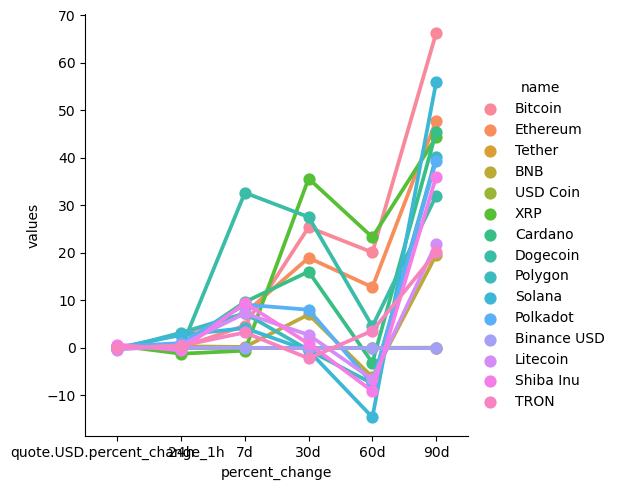

In [28]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [35]:
# Dataframe for specific columns

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28165.75793,2023-04-04 18:21:37.047489
0,Bitcoin,28138.56388,NaT
0,Bitcoin,28138.86845,NaT
0,Bitcoin,28142.24680,NaT
0,Bitcoin,28142.74852,NaT
0,Bitcoin,28142.74852,NaT


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

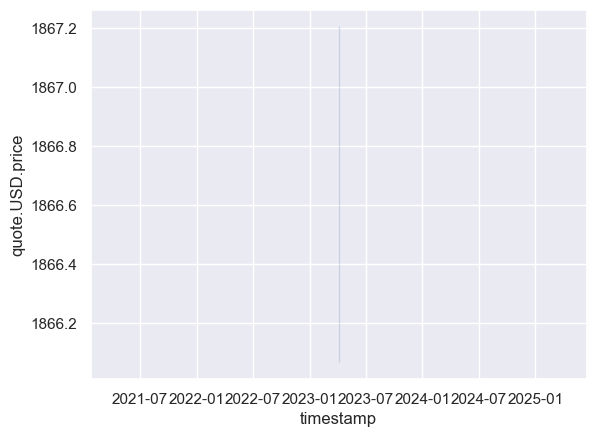

In [34]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10